In [1]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression,
)

np.random.seed(1234)

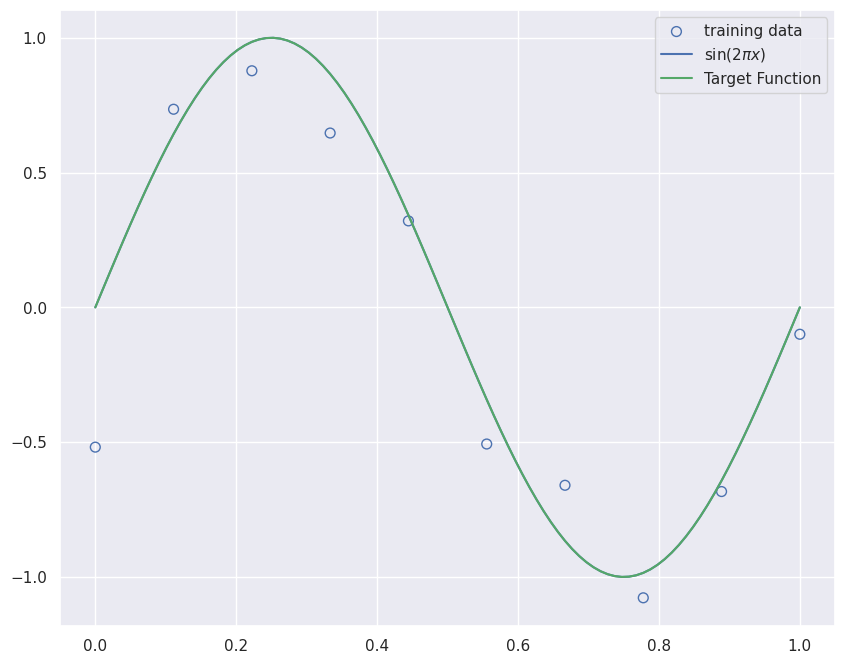

In [5]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y


def sinusoidal(x):
    return np.sin(2 * np.pi * x)


x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[10, 8])
plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()

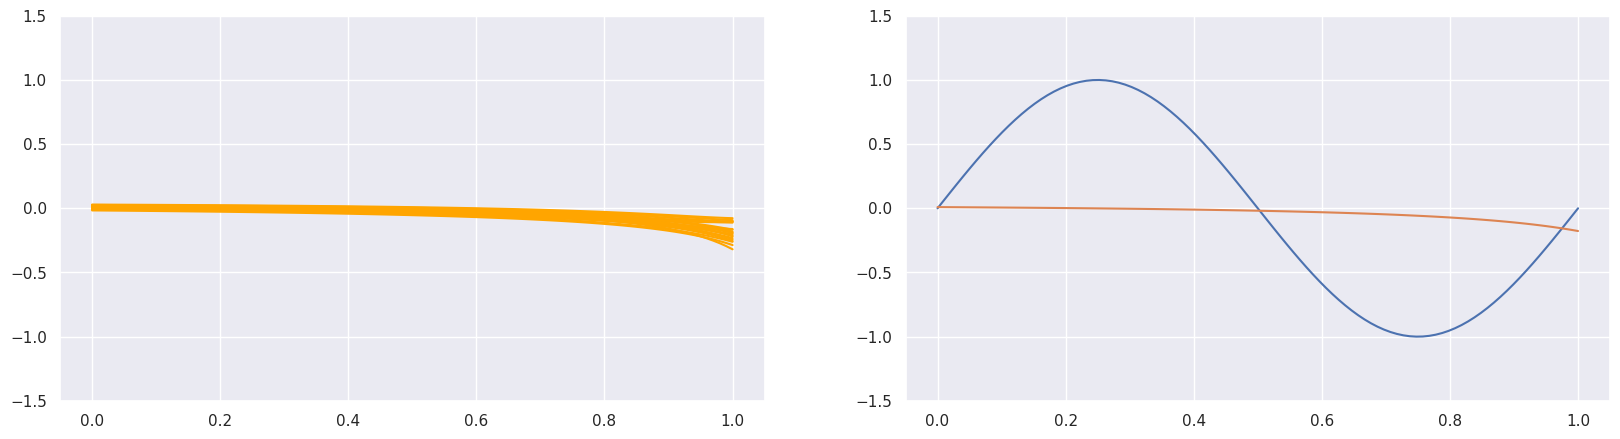

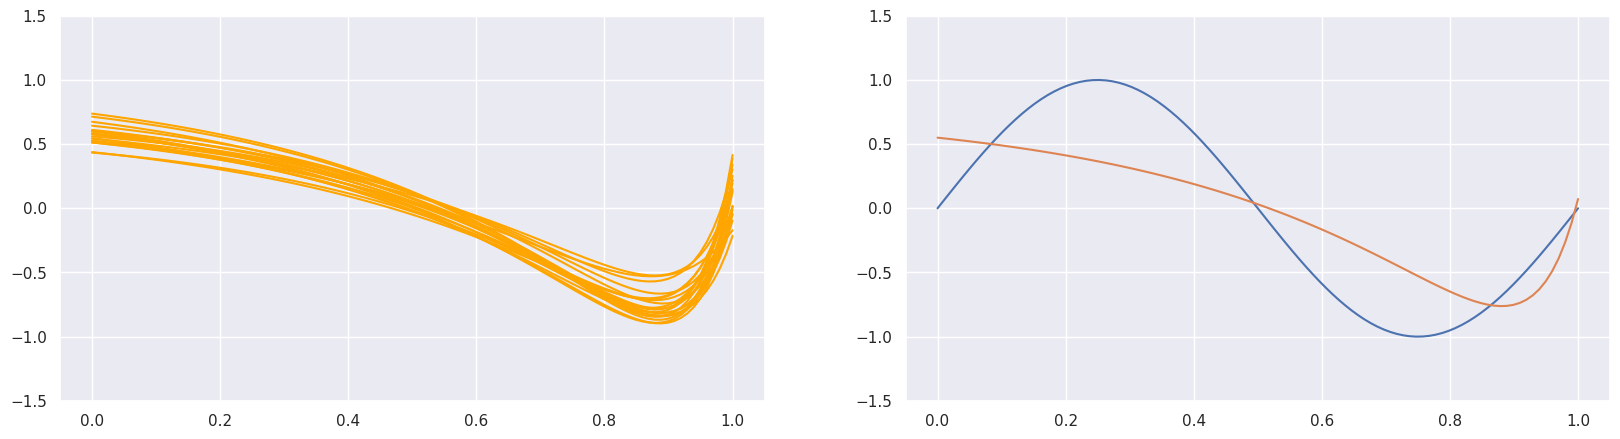

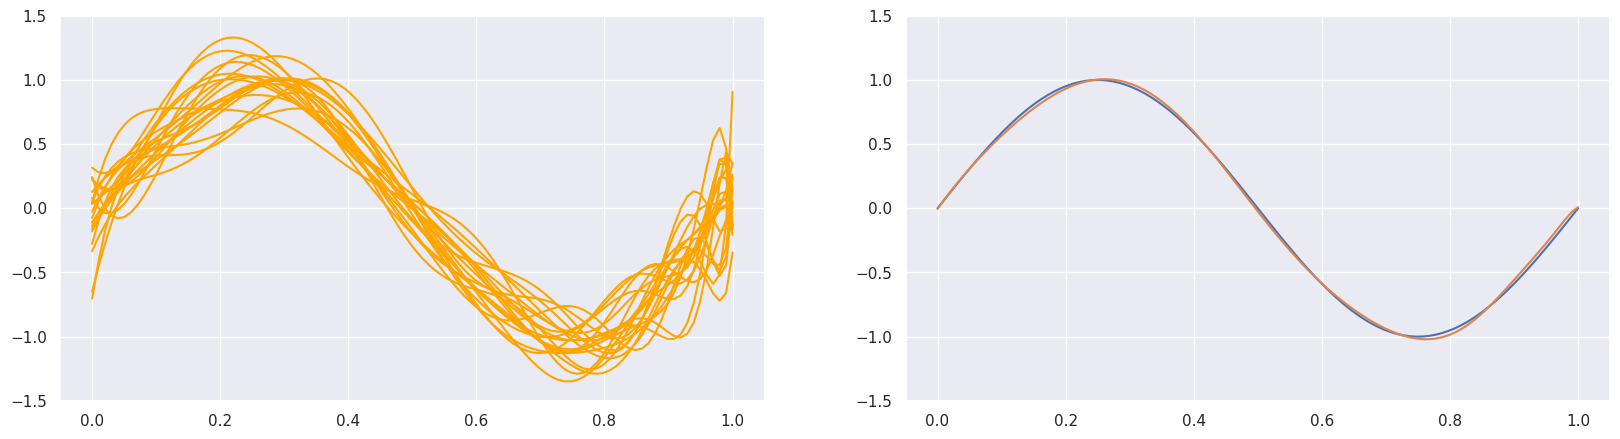

In [6]:
feature = PolynomialFeature(24)
# feature = GaussianFeature(np.linspace(0, 1, 24), 0.1)
# feature = SigmoidalFeature(np.linspace(0, 1, 24), 10)

for a in [1e2, 1.0, 1e-9]:
    y_list = []
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    for i in range(100):
        x_train, y_train = create_toy_data(sinusoidal, 25, 0.25)
        X_train = feature.transform(x_train)
        X_test = feature.transform(x_test)
        model = BayesianRegression(alpha=a, beta=1.0)
        model.fit(X_train, y_train)
        y = model.predict(X_test)
        y_list.append(y)
        if i < 20:
            plt.plot(x_test, y, c="orange")
    plt.ylim(-1.5, 1.5)

    plt.subplot(1, 2, 2)
    plt.plot(x_test, y_test)
    plt.plot(x_test, np.asarray(y_list).mean(axis=0))
    plt.ylim(-1.5, 1.5)
    plt.show()